# Cricket Fielding Performance Analysis Using Python

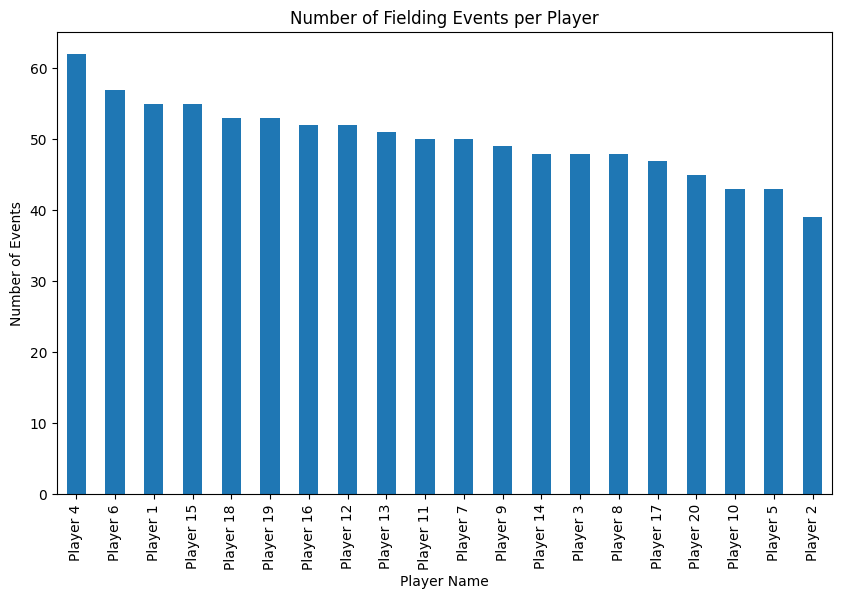

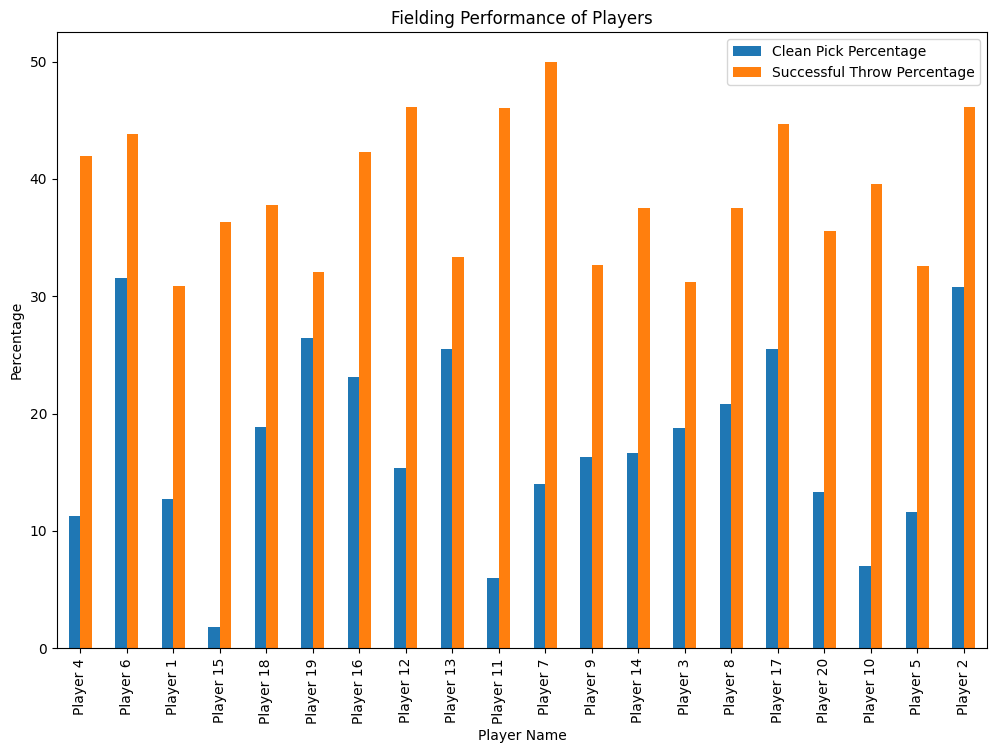

In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv('cricket_fielding_analysis_large_dataset.csv')

# Display the first few rows of the dataset
df.head()

# Basic statistics about the dataset
df.describe()

# Number of fielding events per player
player_events = df['Player Name'].value_counts()

# Plotting the number of fielding events per player
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
player_events.plot(kind='bar')
plt.title('Number of Fielding Events per Player')
plt.xlabel('Player Name')
plt.ylabel('Number of Events')
plt.show()

# Fielding performance analysis
performance = df.groupby('Player Name').agg({
    'Pick': lambda x: (x == 'clean pick').sum(),
    'Throw': lambda x: (x == 'run out').sum() + (x == 'direct hit').sum()
}).rename(columns={'Pick': 'Clean Picks', 'Throw': 'Successful Throws'})

performance['Total Events'] = df['Player Name'].value_counts()
performance['Clean Pick Percentage'] = performance['Clean Picks'] / performance['Total Events'] * 100
performance['Successful Throw Percentage'] = performance['Successful Throws'] / performance['Total Events'] * 100

performance = performance.sort_values(by='Total Events', ascending=False)

# Displaying the performance dataframe
performance

# Plotting the clean pick percentage and successful throw percentage
performance[['Clean Pick Percentage', 'Successful Throw Percentage']].plot(kind='bar', figsize=(12, 8))
plt.title('Fielding Performance of Players')
plt.xlabel('Player Name')
plt.ylabel('Percentage')
plt.show()